In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('University.csv')

In [3]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
from sklearn.preprocessing import StandardScaler 

In [5]:
num_vars = df.select_dtypes(include='number').columns
num_vars

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [7]:
stdsc = StandardScaler()

ndf = pd.DataFrame(
    stdsc.fit_transform(df[num_vars]),
    columns=num_vars,
    index=df.index
)

In [8]:
ndf.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


In [9]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
hcluster = AgglomerativeClustering(n_clusters=3 , linkage='single')

In [12]:
labels = hcluster.fit_predict(ndf)
labels

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0])

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram

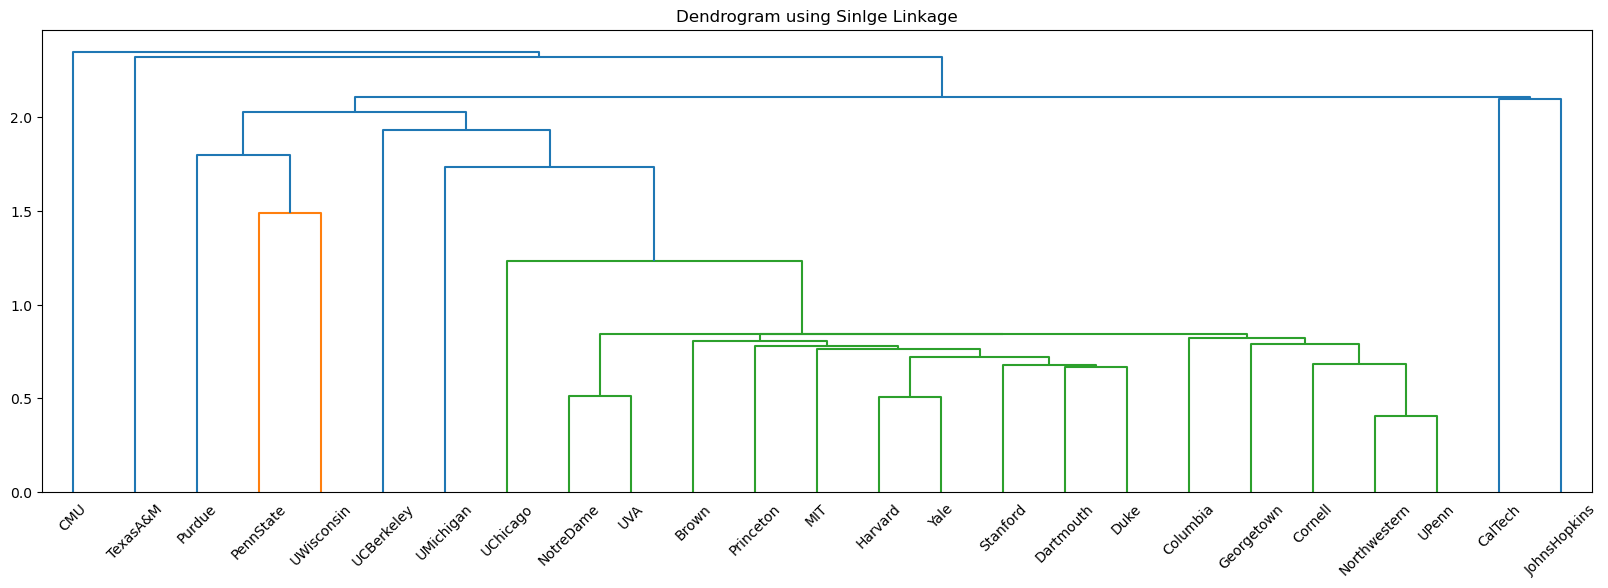

In [55]:
z = linkage(ndf , method='single' , metric='euclidean')
plt.figure(figsize=(20,6))

dendrogram( z , labels = list(df.iloc[:,0]))
plt.title('Dendrogram using Sinlge Linkage')
plt.show()

In [26]:
hcluster = AgglomerativeClustering(n_clusters=3 , linkage='complete')

In [35]:
label = hcluster.fit_predict(ndf)
label

array([2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2,
       2, 0, 1])

In [34]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


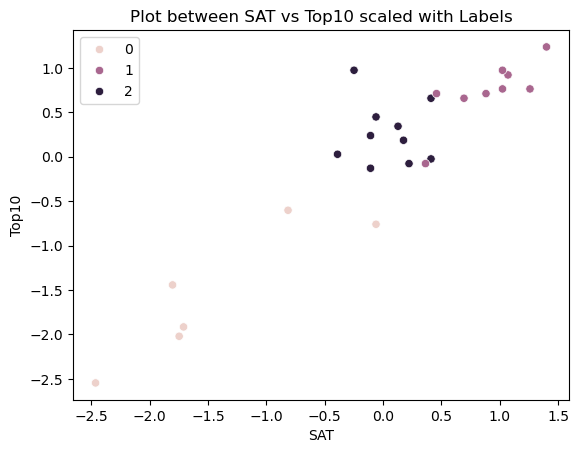

In [54]:
sns.scatterplot(x= ndf.iloc[:,0], y=ndf.iloc[:,1], hue=label)
plt.title('Plot between SAT vs Top10 scaled with Labels')
plt.show()

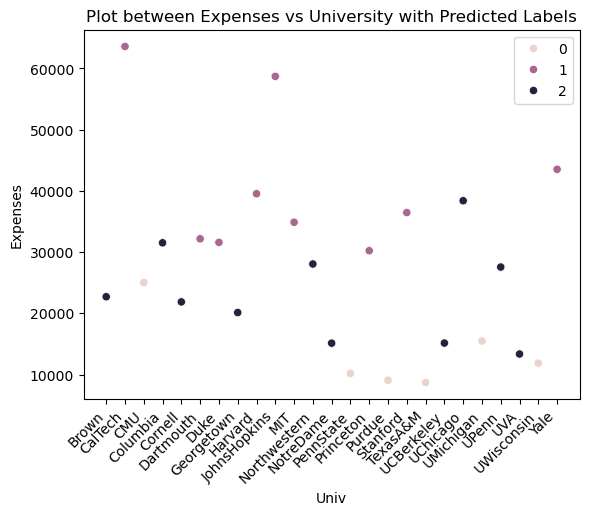

In [53]:
sns.scatterplot(x= df.iloc[:,0], y=df.iloc[:,-2], hue=label)
plt.title('Plot between Expenses vs University with Predicted Labels')
plt.xticks(rotation=45,ha='right')
plt.show()

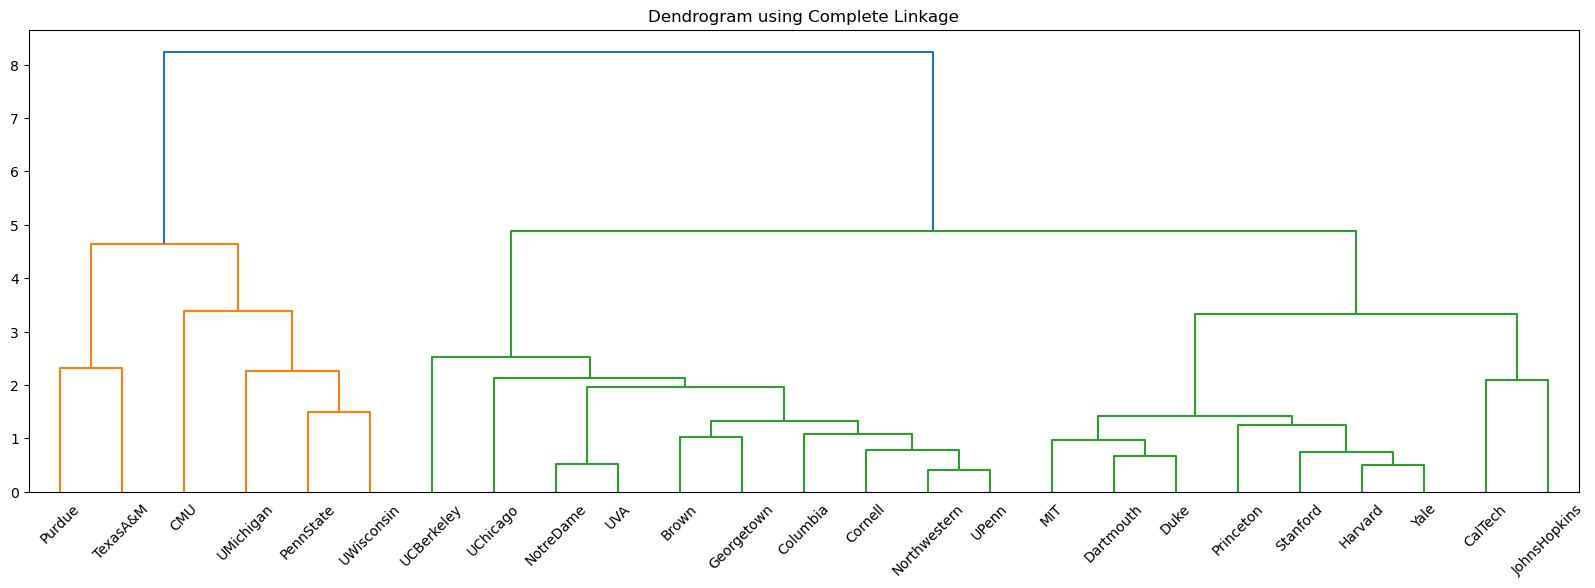

In [56]:
z = linkage(ndf , method='complete' , metric='euclidean')
plt.figure(figsize=(20,6))

dendrogram( z , labels = list(df.iloc[:,0]))
plt.title('Dendrogram using Complete Linkage')
plt.show()